# Plot the data from the json

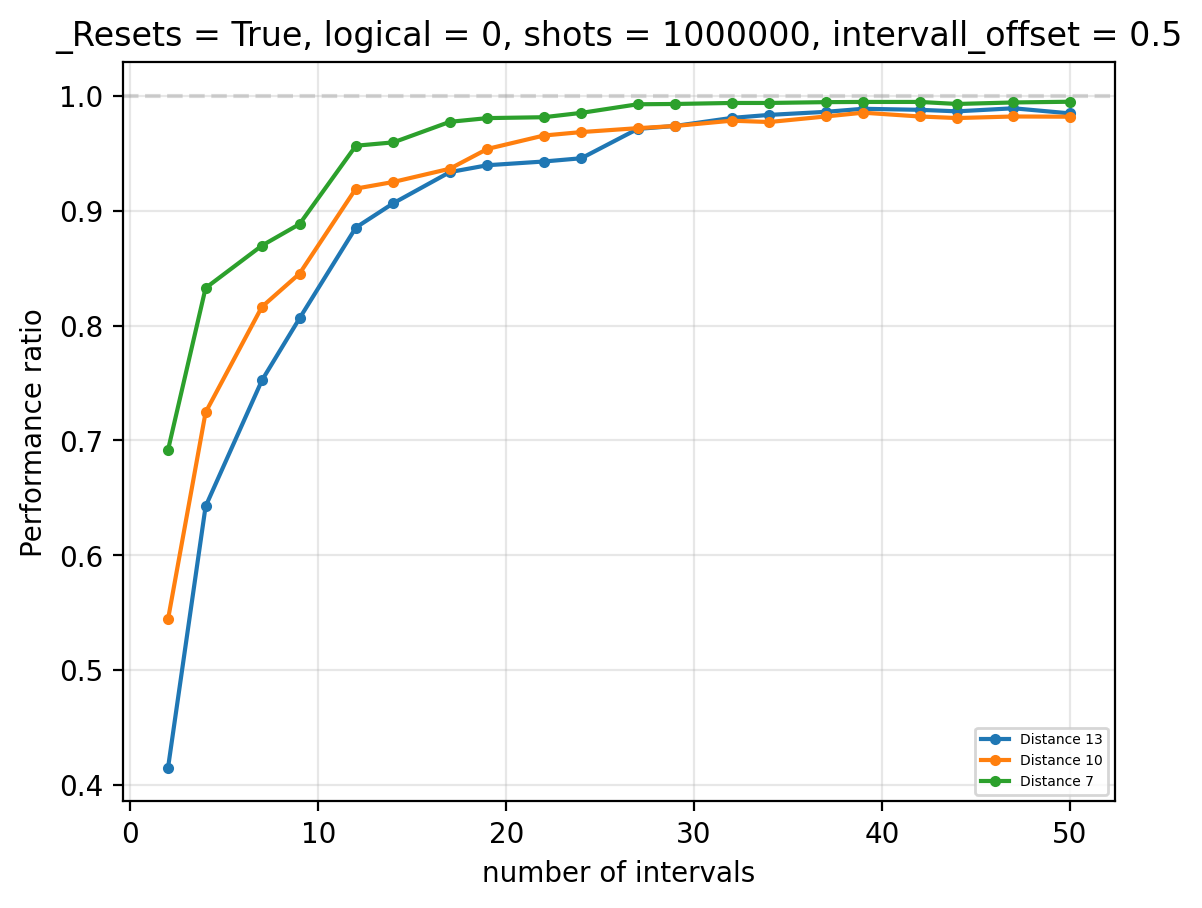

In [5]:
import matplotlib.pyplot as plt 
import json
import numpy as np

with open(f"result_tradeoff_grid_intervals.json", "r") as f:
    data = json.load(f)

plt.figure(dpi=200)
for result in data:
    if result["metadata"]["DEVICE"] != 'ibm_sherbrooke':
        continue
    if result["metadata"]["DISTANCE"] != result["metadata"]["ROUNDS"]:
        continue
    if result["metadata"]["_RESETS"] != True:
        continue
    if result["metadata"]["SHOTS"] != int(1e6):
        continue
    if "interval_offset" not in result["metadata"].keys():
        continue

    if result["metadata"]["interval_offset"] != 0.5:
        continue
    
    if result["metadata"]["DISTANCE"] > 20:
        continue

    if "nbs_intervals" not in result.keys():
        continue

    
    errors = [result["num_errors"][-1]/(e+1e-8) for e in result["num_errors"][:-1]]
    bits = [2**b for b in result["bits"][:-1]]
    bits = result["bits"][:-1]
    plt.plot(np.linspace(2, 50, 20).astype(int)[:], errors[:], label=f"Distance {result['metadata']['DISTANCE']}", marker="o", markersize=3)
    plt.title(f"_Resets = {result['metadata']['_RESETS']}, logical = {result['metadata']['LOGICAL']}, shots = {result['metadata']['SHOTS']}, intervall_offset = {result['metadata']['interval_offset']}")
    plt.xlabel("Number of bits (2**bits intervals)")
    plt.xlabel("number of intervals")
    plt.xticks()
    plt.ylabel("Performance ratio")
    # plt.ylim(0.6, 1.1)
    # plt.xticks(bits)
    plt.axhline(y=1, color='grey', linestyle='--', alpha=0.1)
    plt.legend(fontsize=5)
    plt.grid(alpha=0.3)


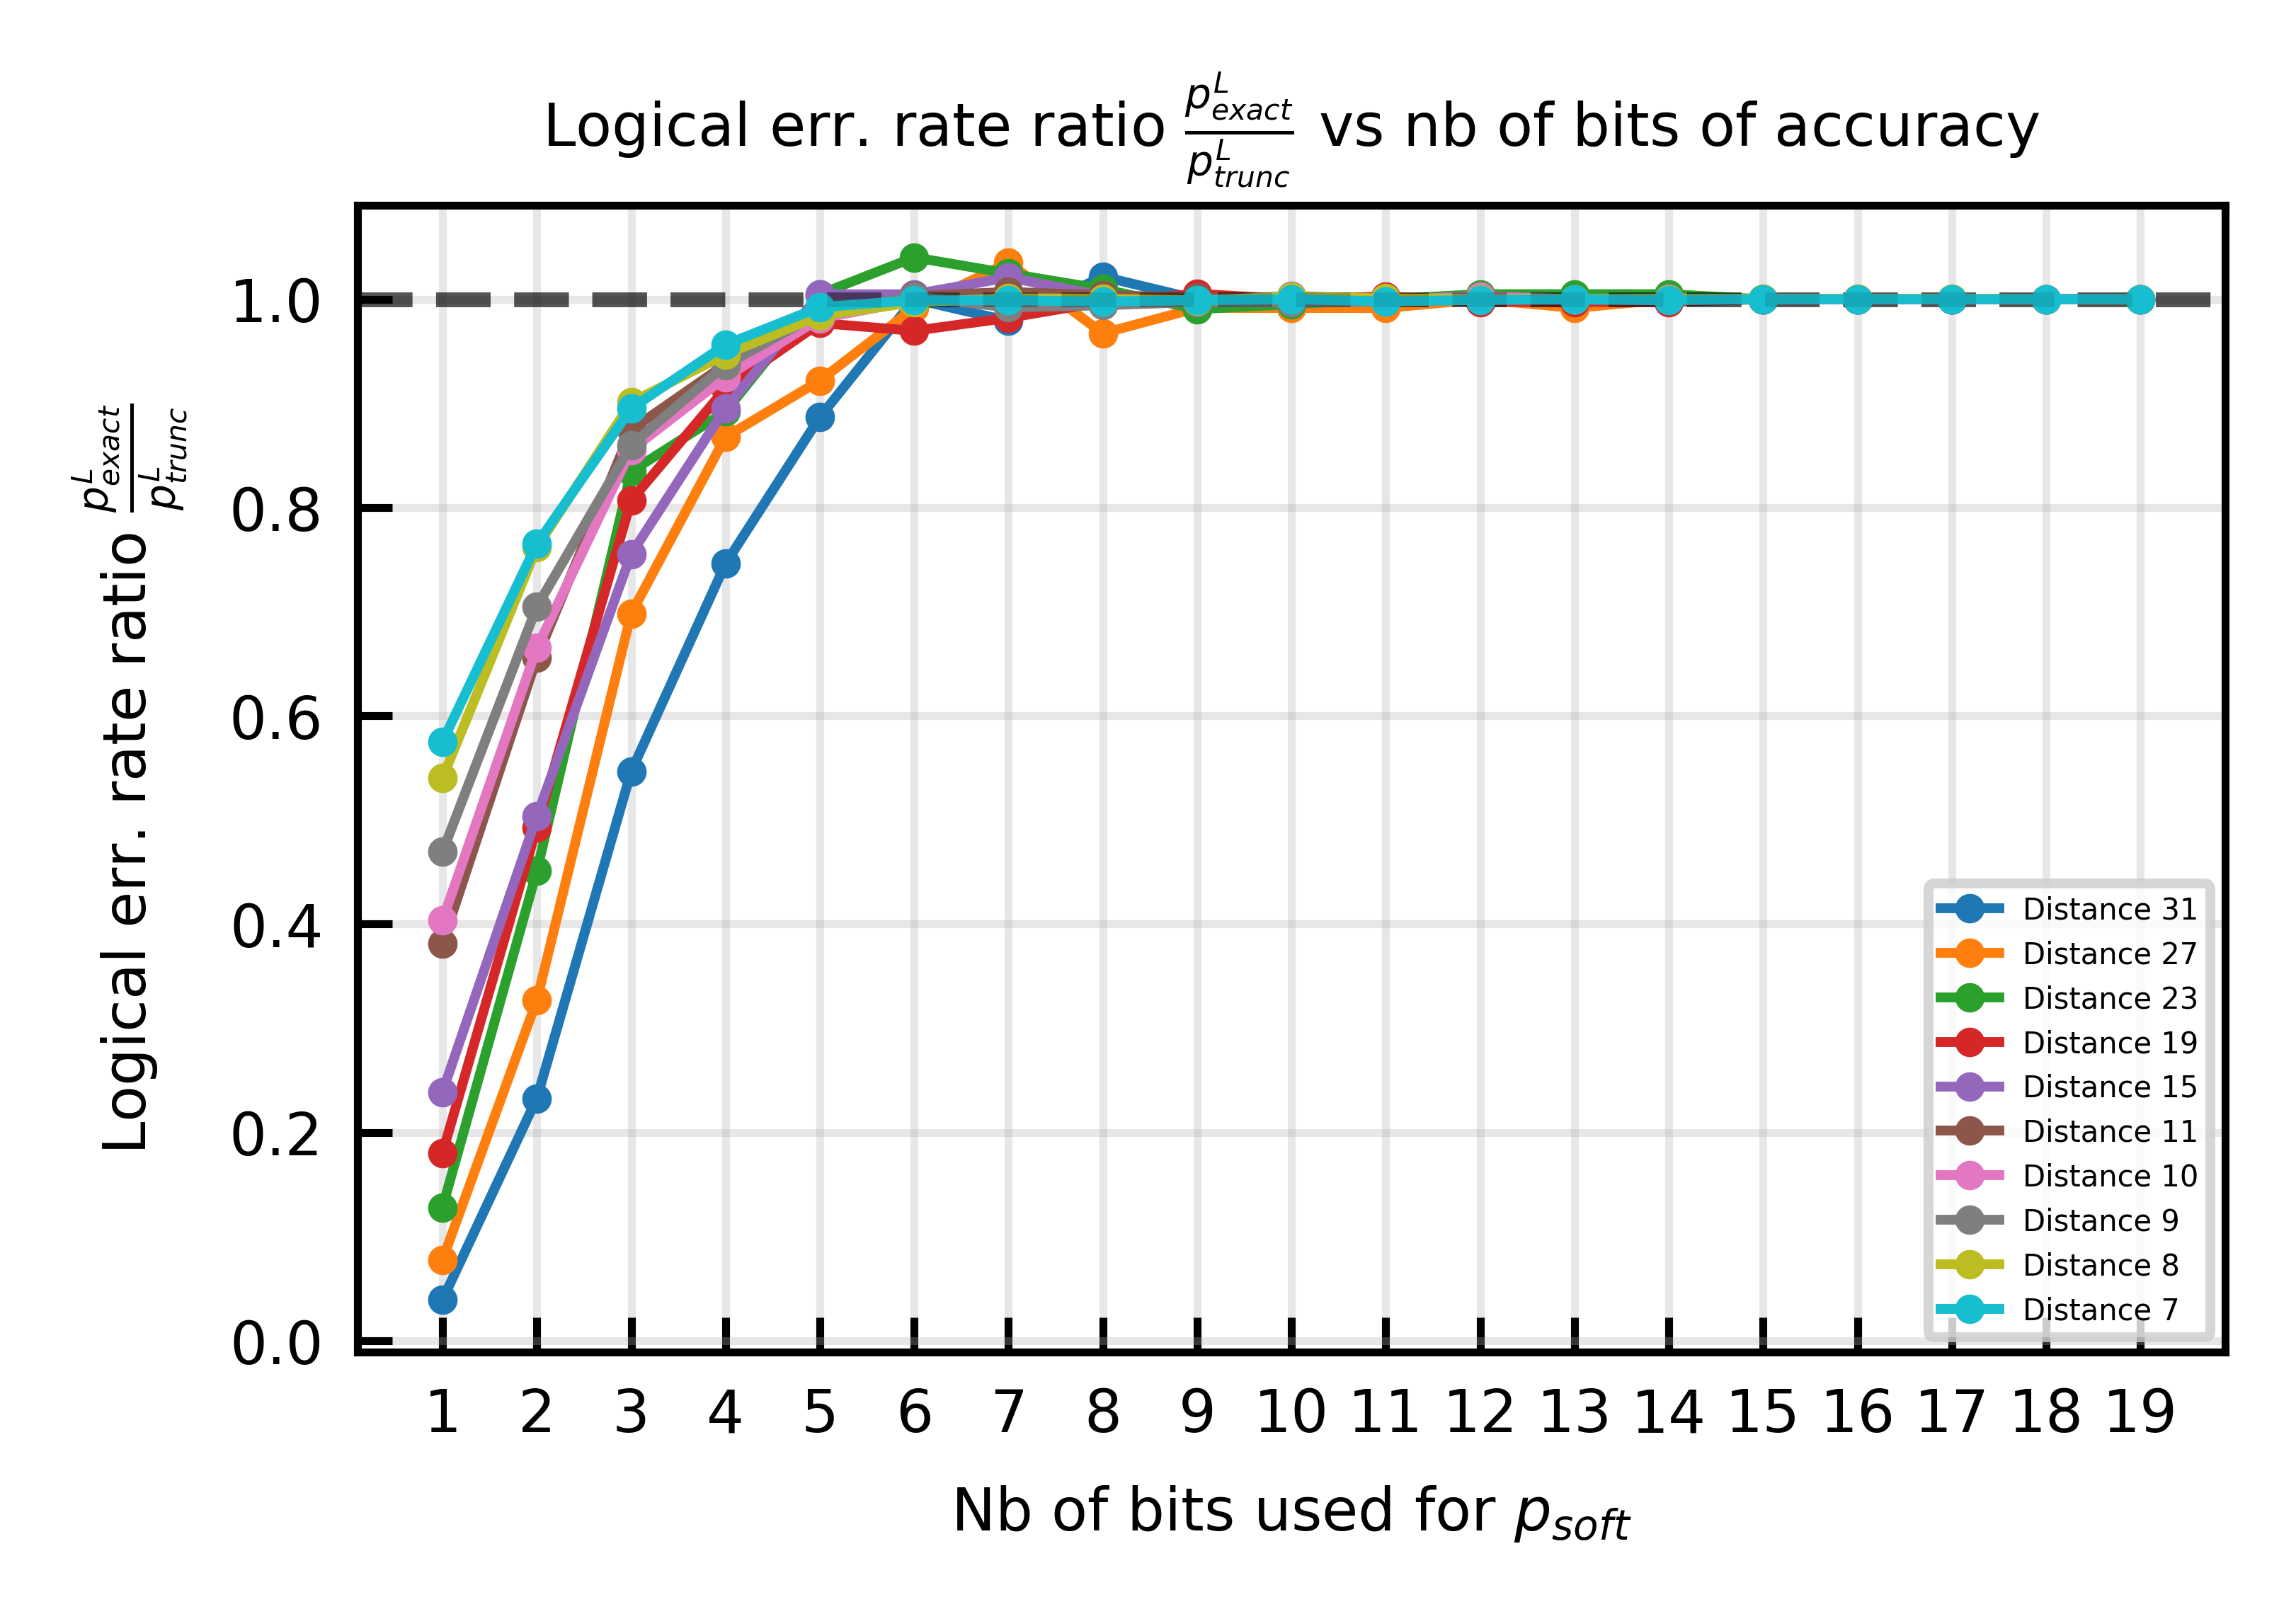

In [1]:
import matplotlib.pyplot as plt 
import json
import numpy as np

FIGURE_WIDTH_1COL = 3.404  # For PRX style, change for according to journal
FIGURE_WIDTH_2COL = 7.057  # For PRX style, change for according to journal
FIGURE_HEIGHT_1COL_GR = FIGURE_WIDTH_1COL*2/(1 + np.sqrt(5))
FIGURE_HEIGHT_2COL_GR = FIGURE_WIDTH_2COL*2/(1 + np.sqrt(5))

font_size = 6 # For PRX style, change for according to journal

plt.rcParams.update({
    'font.size'           : font_size,  
    'figure.titlesize'    : 'medium',
    'figure.dpi'          : 1000,
    'figure.figsize'      : (FIGURE_WIDTH_1COL, FIGURE_HEIGHT_1COL_GR),
    'axes.titlesize'      : 'medium',
    'axes.axisbelow'      : True,
    'xtick.direction'     : 'in',
    'xtick.labelsize'     : 'small',
    'ytick.direction'     : 'in',
    'ytick.labelsize'     : 'small',
    'image.interpolation' : 'none',
    'legend.fontsize'     : font_size,
    'axes.labelsize'      : font_size,
    'axes.titlesize'      : font_size,
    'xtick.labelsize'     : font_size,
    'ytick.labelsize'     : font_size,
})


plt.rcParams.update({'font.family':'sans-serif'})





with open(f"result_tradeoff_grid.json", "r") as f:
    data = json.load(f)

plt.figure(dpi=1000)
for result in data:
    if result["metadata"]["DEVICE"] != 'ibm_sherbrooke':
        continue
    if result["metadata"]["DISTANCE"] != result["metadata"]["ROUNDS"]:
        continue
    if result["metadata"]["_RESETS"] != False:
        continue
    if result["metadata"]["SHOTS"] != int(2e5):
        continue
    if "interval_offset" not in result["metadata"].keys():
        continue

    if result["metadata"]["interval_offset"] != 0.5:
        continue
    
    if result["metadata"]["DISTANCE"] > 31:
        continue

    if result["metadata"]["DISTANCE"] < 7:
        continue

    
    errors = [result["num_errors"][-1]/(e+1e-8) for e in result["num_errors"][:-1]]
    bits = [2**b for b in result["bits"][:-1]]
    bits = result["bits"][:-1]
    plt.plot(bits, errors[:], label=f"Distance {result['metadata']['DISTANCE']}", marker="o", markersize=2, linewidth=1)
    # plt.title(f"_Resets = {result['metadata']['_RESETS']}, logical = {result['metadata']['LOGICAL']}, shots = {result['metadata']['SHOTS']}, intervall_offset = {result['metadata']['interval_offset']}")
    plt.title(r"Logical err. rate ratio $\frac{p^{L}_{exact}}{p^{L}_{trunc}}$ vs nb of bits of accuracy")
    plt.xlabel(r"Nb of bits used for $p_{soft}$")
    plt.xticks()
    plt.ylabel(r"Logical err. rate ratio $\frac{p^{L}_{exact}}{p^{L}_{trunc}}$")
    plt.xticks(bits)
    plt.axhline(y=1, color='black', linestyle='--', alpha=0.1)
    plt.legend(fontsize=3)
    plt.grid(alpha=0.3)
